[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/{notebook_path})


In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("permission-based_malware.csv") #  read a CSV file named into a DataFrame called df
target = "CLASS" # target variable or outcome variable, which represents the variable that you're trying to predict or model.

In [5]:
df.shape # This will output a tuple with two elements: the number of rows and the number of columns in the DataFrame.

(1168, 950)

In [6]:
df.info() # info() method in pandas DataFrame provides a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 950 entries, NAME to CLASS
dtypes: int64(949), object(1)
memory usage: 8.5+ MB


In [7]:
df[target].value_counts() #  print the counts of each unique value in the target column of the DataFrame.

CLASS
1    602
0    566
Name: count, dtype: int64

In [8]:
X = df.loc[: , df.columns!=target] # X will contain all the features (columns) of the DataFrame df except for the target column
X = X.loc[: , X.columns!="NAME"]
y = df[target] # y will contain the target column, which represents the target variable.

# Feature selection

## Chi-square test

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def u_f(X,y,num_of_feat):
  bestfeatures = SelectKBest(score_func=chi2, k=10) # Select the top 10 features based on the chi-squared statistic (chi2) with k=10
  fit = bestfeatures.fit(X,y) # Fitting the Feature Selector

  # Convert the chi-squared scores and column names into pandas DataFrames (dfscores and dfcolumns, respectively).
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)


  # Concat two dataframes for better visualization
  # Concatenate the column names and chi-squared scores DataFrames along the columns axis to create a single DataFrame (featureScores).
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  # Renames the columns of the DataFrame to 'Specs' and 'Score'


  sorted_df = featureScores.sort_values(by=['Score'], ascending=False) # Sorts the DataFrame by the chi-squared scores in descending order.
  Univarient_feature = sorted_df["Specs"][:num_of_feat] # Selecting Top Features
  return Univarient_feature

## Function Call

In [10]:
univarient_list = u_f(X,y,300) # univarient_list will contain the names of the top features selected using the chi-squared scoring function
univarient_list

535                          android.permission.SEND_SMS
421                       android.permission.RECEIVE_SMS
637                          android.permission.READ_SMS
296               android.permission.SYSTEM_ALERT_WINDOW
321                         android.permission.WRITE_SMS
                             ...                        
136               android.permission.FORCE_STOP_PACKAGES
800                     android.permission.USE_BIOMETRIC
655        com.lenovo.launcher.permission.WRITE_SETTINGS
84                   android.permission.BROADCAST_STICKY
12     android.permission.ACCESS_LOCATION_EXTRA_COMMANDS
Name: Specs, Length: 300, dtype: object

In [11]:
# Selecting only the features that were identified as significant through the Univariate Feature Selection
X = df.loc[:,univarient_list] # Selects columns from the DataFrame df and stores them in the variable X
y = df[target] # Assigns the target variable, which is typically the variable you are trying to predict

In [12]:
X

android.permission.SEND_SMS  android.permission.RECEIVE_SMS  \
0                               1                               1   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
...                           ...                             ...   
1163                            0                               0   
1164                            1                               1   
1165                            1                               1   
1166                            1                               1   
1167                            0                               0   

      android.permission.READ_SMS  android.permission.SYSTEM_ALERT_WINDOW  \
0                               1                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       1   
4                               0                                       0   
...                           ...                                     ...   
1163                            0                                       0   
1164                            1                                       1   
1165                            1                                       1   
1166                            1                                       0   
1167                            1                                       1   

      android.permission.WRITE_SMS  android.permission.RECEIVE_BOOT_COMPLETED  \
0                                1                                          1   
1                                0                                          0   
2                                0                                          0   
3                                0                                          0   
4                                0                                          0   
...                            ...                                        ...   
1163                             1                                          1   
1164                             1                                          1   
1165                             1                                          1   
1166                             1                                          0   
1167                             0                                          1   

      android.permission.CHANGE_NETWORK_STATE  \
0                                           1   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
1163                                        0   
1164                                        0   
1165                                        1   
1166                                        0   
1167                                        0   

      android.permission.FOREGROUND_SERVICE  \
0                                         1   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
1163                                      0   
1164                                      0   
1165                                      1   
1166                                      0   
1167                                      0   

      android.permission.READ_PHONE_STATE  android.permission.GET_TASKS  ...  \
0                                       1    

In [13]:
from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn's model_selection module.

#  Splits features (X) and target variable (y) into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [14]:
X_train

android.permission.SEND_SMS  android.permission.RECEIVE_SMS  \
0                              0                               0   
1                              0                               1   
2                              1                               1   
3                              1                               0   
4                              1                               1   
..                           ...                             ...   
929                            1                               1   
930                            0                               0   
931                            1                               1   
932                            0                               0   
933                            0                               0   

     android.permission.READ_SMS  android.permission.SYSTEM_ALERT_WINDOW  \
0                              0                                       1   
1                              1                                       1   
2                              1                                       1   
3                              0                                       0   
4                              1                                       0   
..                           ...                                     ...   
929                            1                                       1   
930                            0                                       1   
931                            1                                       1   
932                            0                                       0   
933                            0                                       0   

     android.permission.WRITE_SMS  android.permission.RECEIVE_BOOT_COMPLETED  \
0                               0                                          1   
1                               0                                          1   
2                               1                                          1   
3                               0                                          0   
4                               1                                          1   
..                            ...                                        ...   
929                             1                                          1   
930                             0                                          0   
931                             1                                          1   
932                             0                                          1   
933                             0                                          1   

     android.permission.CHANGE_NETWORK_STATE  \
0                                          0   
1                                          1   
2                                          1   
3                                          0   
4                                          1   
..                                       ...   
929                                        1   
930                                        0   
931                                        1   
932                                        0   
933                                        0   

     android.permission.FOREGROUND_SERVICE  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        1   
..                                     ...   
929                                      0   
930                                      0   
931                                      0   
932                                      0   
933                                      0   

     android.permission.READ_PHONE_STATE  android.permission.GET_TASKS  ...  \
0                                      0                             0  ...   
1                         

# RandomForest

## Default Param

In [15]:
from sklearn.ensemble import RandomForestClassifier # Importing RandomForestClassifier from scikit-learn.
rf_default = RandomForestClassifier() # Creating an instance of RandomForestClassifier with default hyperparameters.
rf_default.fit(X_train, y_train) # Fitting the RandomForestClassifier model to the training data (X_train, y_train)
y_pred_test=rf_default.predict(X_test) # Using the trained RandomForestClassifier model (rf_default) to make predictions on the test data (X_test).


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Importing necessary evaluation metrics from scikit-learn.

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[101   7]
 [ 13 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       108
           1       0.94      0.90      0.92       126

    accuracy                           0.91       234
   macro avg       0.91      0.92      0.91       234
weighted avg       0.92      0.91      0.91       234


Accuracy: 0.9145299145299145


In [16]:
# Creating an instance of the RandomForestClassifier class
rf_all = RandomForestClassifier(n_estimators=106,max_depth=26,random_state=0)
rf_all.fit(X_train, y_train) # trains (fits) the RandomForestClassifier model on the training data.
y_pred=rf_all.predict(X_test) # uses the trained RandomForestClassifier model (rf_all) to make predictions on the test data (X_test).
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9102564102564102


In [17]:
rf_all = RandomForestClassifier(n_estimators=106,max_depth=26,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_train) # predicts the target labels (y_pred) for the training data (X_train) using the trained rf_all model.
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9796573875802997


# GradientBoosting

## Default Param

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gb_default = GradientBoostingClassifier()
gb_default.fit(X_train, y_train)
y_pred_test=gb_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[104   4]
 [ 17 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       108
           1       0.96      0.87      0.91       126

    accuracy                           0.91       234
   macro avg       0.91      0.91      0.91       234
weighted avg       0.92      0.91      0.91       234


Accuracy: 0.9102564102564102


In [19]:
gb_all = GradientBoostingClassifier(n_estimators=166,max_depth=11,random_state=0)
gb_all.fit(X_train, y_train)
y_pred=gb_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9145299145299145


In [20]:
gb_all = GradientBoostingClassifier(n_estimators=166,max_depth=11,random_state=0)
gb_all.fit(X_train, y_train)
y_pred =gb_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.987152034261242


# XGBoost

## Default Param

In [21]:
import xgboost as xgb
xg_default = xgb.XGBClassifier() # Create an instance of XGBoost classifier
xg_default.fit(X_train, y_train) # Train the classifier
y_pred_test = xg_default.predict(X_test) # Predict on the test data

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[104   4]
 [ 15 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       108
           1       0.97      0.88      0.92       126

    accuracy                           0.92       234
   macro avg       0.92      0.92      0.92       234
weighted avg       0.92      0.92      0.92       234


Accuracy: 0.9188034188034188


In [22]:
xg_all = xgb.XGBClassifier(n_estimators=56,max_depth=6,random_state=0)
xg_all.fit(X_train, y_train)
y_pred = xg_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9230769230769231


In [23]:
xg_all = xgb.XGBClassifier(n_estimators=56,max_depth=6,random_state=0)
xg_all.fit(X_train, y_train)
y_pred = xg_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9700214132762313


# boost-histogram

## Default Param

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier
hist_default = HistGradientBoostingClassifier()
hist_default.fit(X_train, y_train)
y_pred_test = hist_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))

Confusion Matrix:
[[101   7]
 [ 13 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       108
           1       0.94      0.90      0.92       126

    accuracy                           0.91       234
   macro avg       0.91      0.92      0.91       234
weighted avg       0.92      0.91      0.91       234


Accuracy: 0.9145299145299145


In [25]:
hist_all = HistGradientBoostingClassifier(max_iter=51,max_depth=16,random_state=0)
hist_all.fit(X_train, y_train)
y_pred = hist_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test,y_pred))

Accurecy:  0.9316239316239316


In [26]:
hist_all = HistGradientBoostingClassifier(max_iter=51,max_depth=16,random_state=0)
hist_all.fit(X_train, y_train)
y_pred = hist_all.predict(X_train)
print("Accurecy: ",accuracy_score(y_train,y_pred))

Accurecy:  0.9518201284796574


# XAi: LIME

In [26]:
#!pip install lime

## Function

In [27]:
import lime
from lime import lime_tabular


def LIME_EXP(row,model):

  explainer = lime_tabular.LimeTabularExplainer(
      training_data=np.array(X_train),
      feature_names=univarient_list,
      class_names=["Benign","Malware"]
  )


  explanation = explainer.explain_instance(X_test.iloc[row],
                              model.predict_proba,num_features=10)

  # Print feature contributions
  explanation.show_in_notebook()
  return explanation

## Index of Row to explain

In [28]:
# list(y_test)[6]
y_test

0      1
1      1
2      1
3      0
4      0
      ..
229    1
230    0
231    1
232    1
233    1
Name: CLASS, Length: 234, dtype: int64

In [61]:
row = 183
ex_specie = np.array(X_test.iloc[row]).reshape(1,-1)

# Hist XAi

In [62]:
print("Actual value of row ",row," : ",y_test[row])
print("Prediction of row ",row," : ",hist_all.predict(ex_specie)[0])

Actual value of row  183  :  0
Prediction of row  183  :  0


c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [63]:
LIME_EXP(row,hist_all).save_to_file("hist_all_"+str(row)+".html")

c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

# RF XAi

In [64]:
print("Actual value of row ",row," : ",y_test[row])
print("Prediction of row ",row," : ",rf_all.predict(ex_specie)[0])

Actual value of row  183  :  0
Prediction of row  183  :  0


c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
LIME_EXP(row,rf_all).save_to_file("rf_all_"+str(row)+".html")

c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

# GB XAi

In [66]:
print("Actual value of row ",row," : ",y_test[row])
print("Prediction of row ",row," : ",gb_all.predict(ex_specie)[0])

Actual value of row  183  :  0
Prediction of row  183  :  0


c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [67]:
LIME_EXP(row,gb_all).save_to_file("gb_all_"+str(row)+".html")

c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

# XG XAi

In [59]:
print("Actual value of row ",row," : ",y_test[row])
print("Prediction of row ",row," : ",xg_all.predict(ex_specie)[0])

Actual value of row  185  :  1
Prediction of row  185  :  1


In [60]:
LIME_EXP(row,xg_all).save_to_file("xg_all_"+str(row)+".html")

c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nadip\anaconda3\envs\Test_Environment\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

# SHAP

In [27]:
!pip install shap

   ---------------------------------------- 0.0/453.3 kB ? eta -:--:--
   ---- ----------------------------------- 51.2/453.3 kB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 81.9/453.3 kB 1.2 MB/s eta 0:00:01
   ----------- ---------------------------- 133.1/453.3 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 184.3/453.3 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 235.5/453.3 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/453.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 317.4/453.3 kB 1.0 MB/s eta 0:00:01
   --------------------------------- ------ 378.9/453.3 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 419.8/453.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 453.3/453.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -

In [39]:
import shap
import matplotlib.pyplot as plt


def SHAP_EXP(model):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer (X_test)
  ind = 2
  features_names = univarient_list

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=30,show=False)
  plt.show()

  print("Global Explaination")
  shap.summary_plot(shap_values1,max_display=30,show=False)
  plt.show()

  print("__________________________")
  shap.plots.violin(shap_values1,max_display=30,show=False)
  plt.show()

  print("Local Explaination")
  shap.plots.violin(shap_values1,feature_names=features_names, max_display=30,show=False)
  plt.show()

  print("___________________________")
  print("Local Explaination")
  shap.plots.waterfall(shap_values1[ind],max_display=30,show=False)
  plt.show()

  print("Local Explaination")
  shap.plots.bar(shap_values1[ind],max_display=30,show=False)
  plt.show()


Models:  HistGradientBoostingClassifier(max_depth=16, max_iter=51, random_state=0)


PermutationExplainer explainer: 235it [00:29,  5.13it/s]                         


Global Explaination


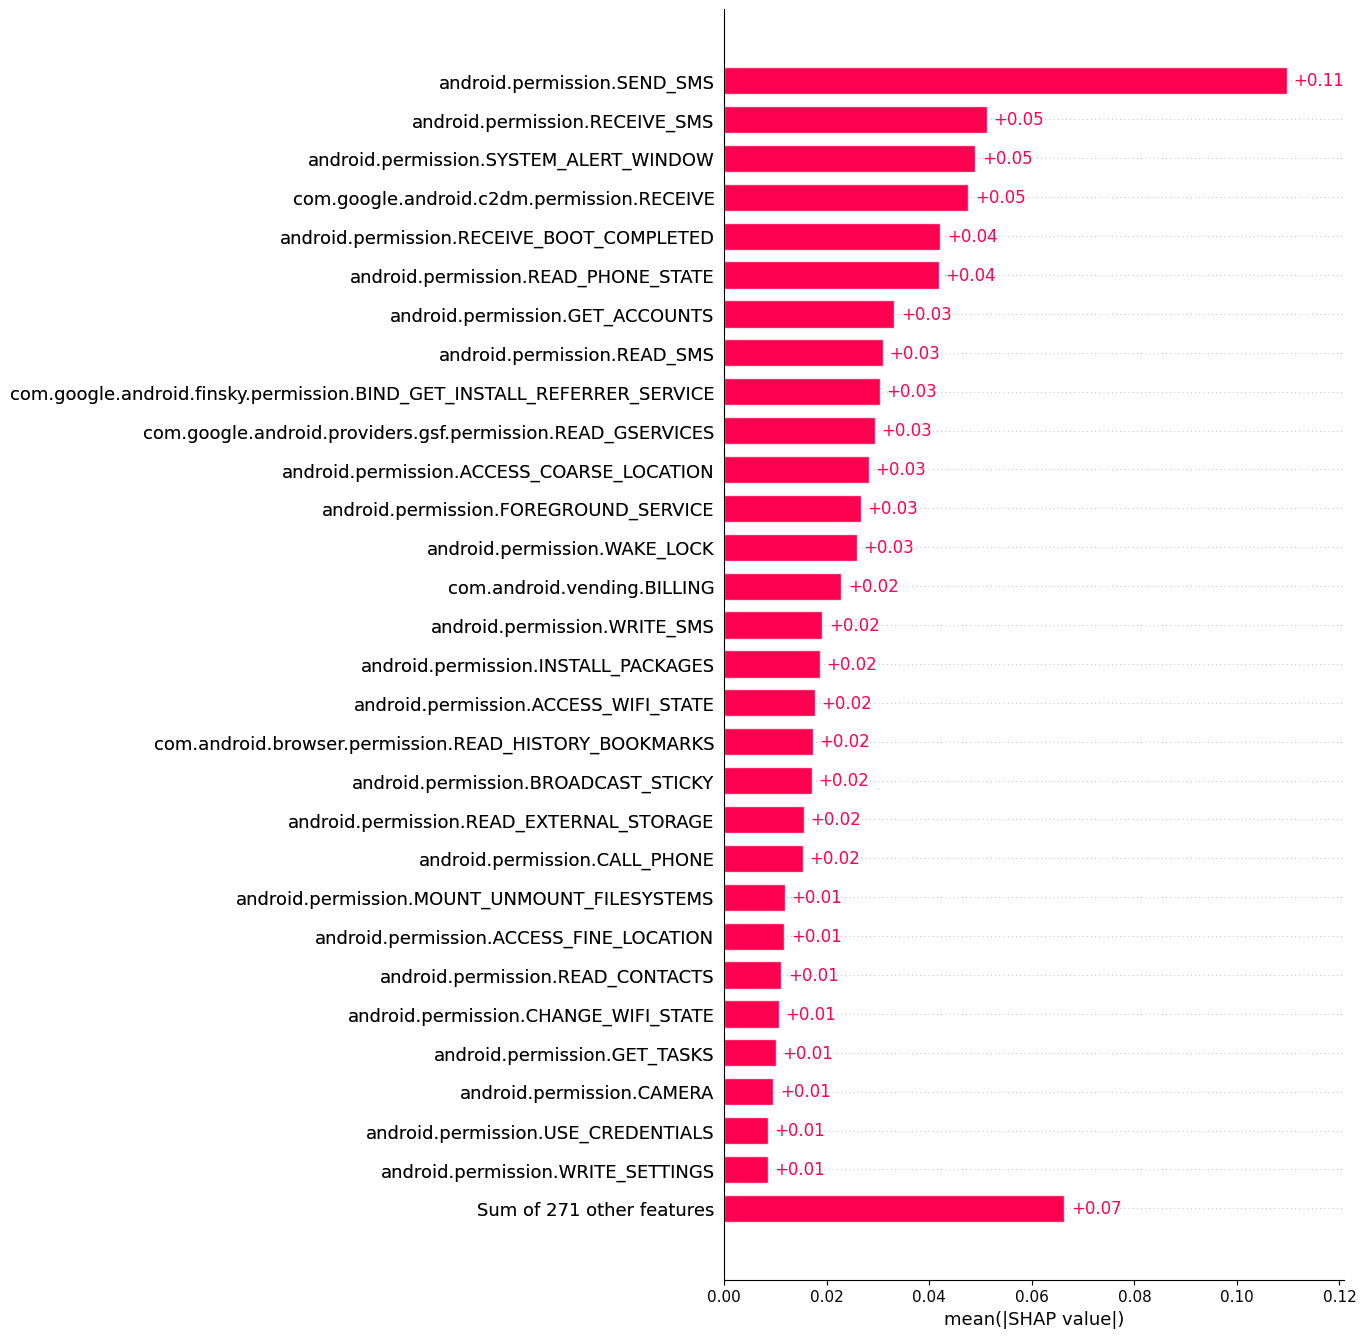

Global Explaination


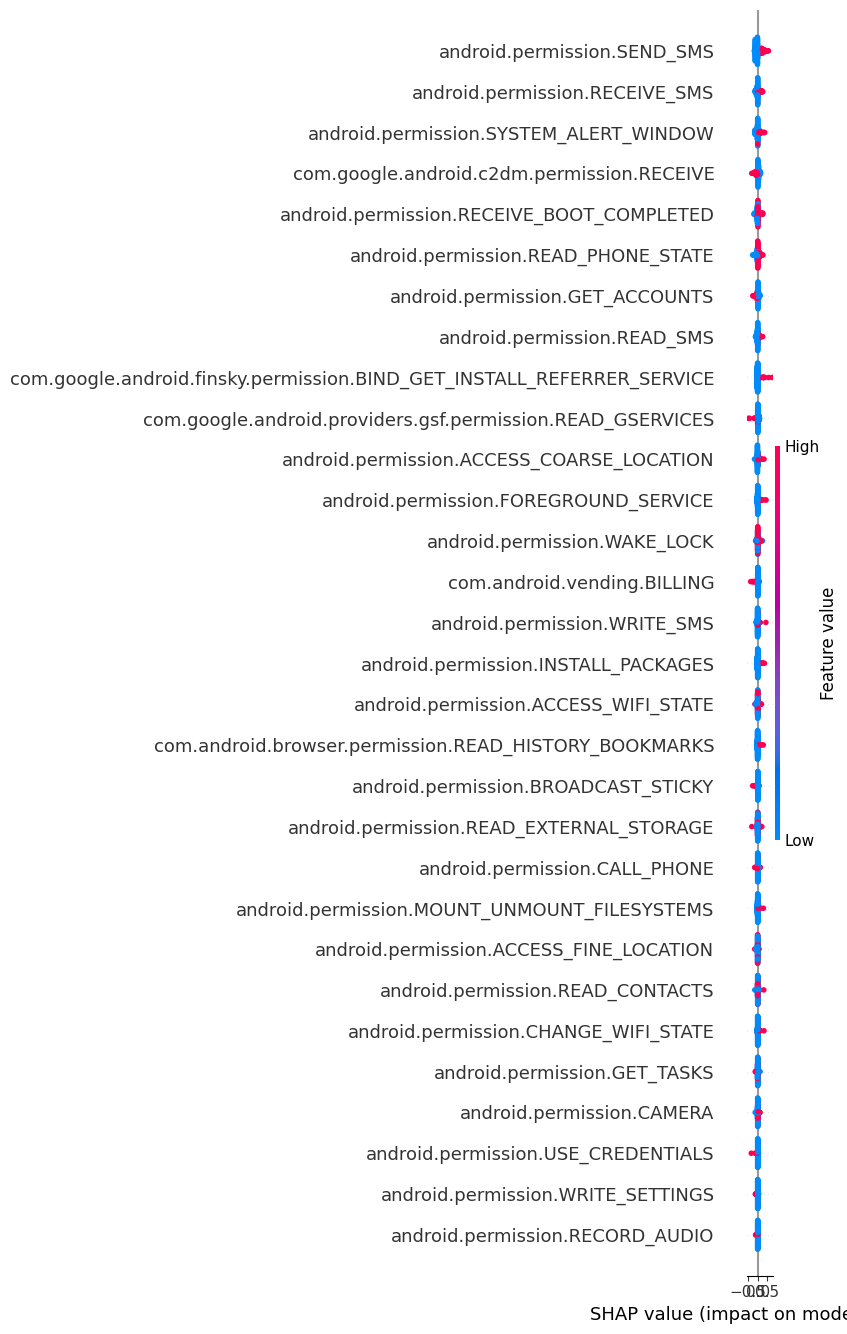

__________________________


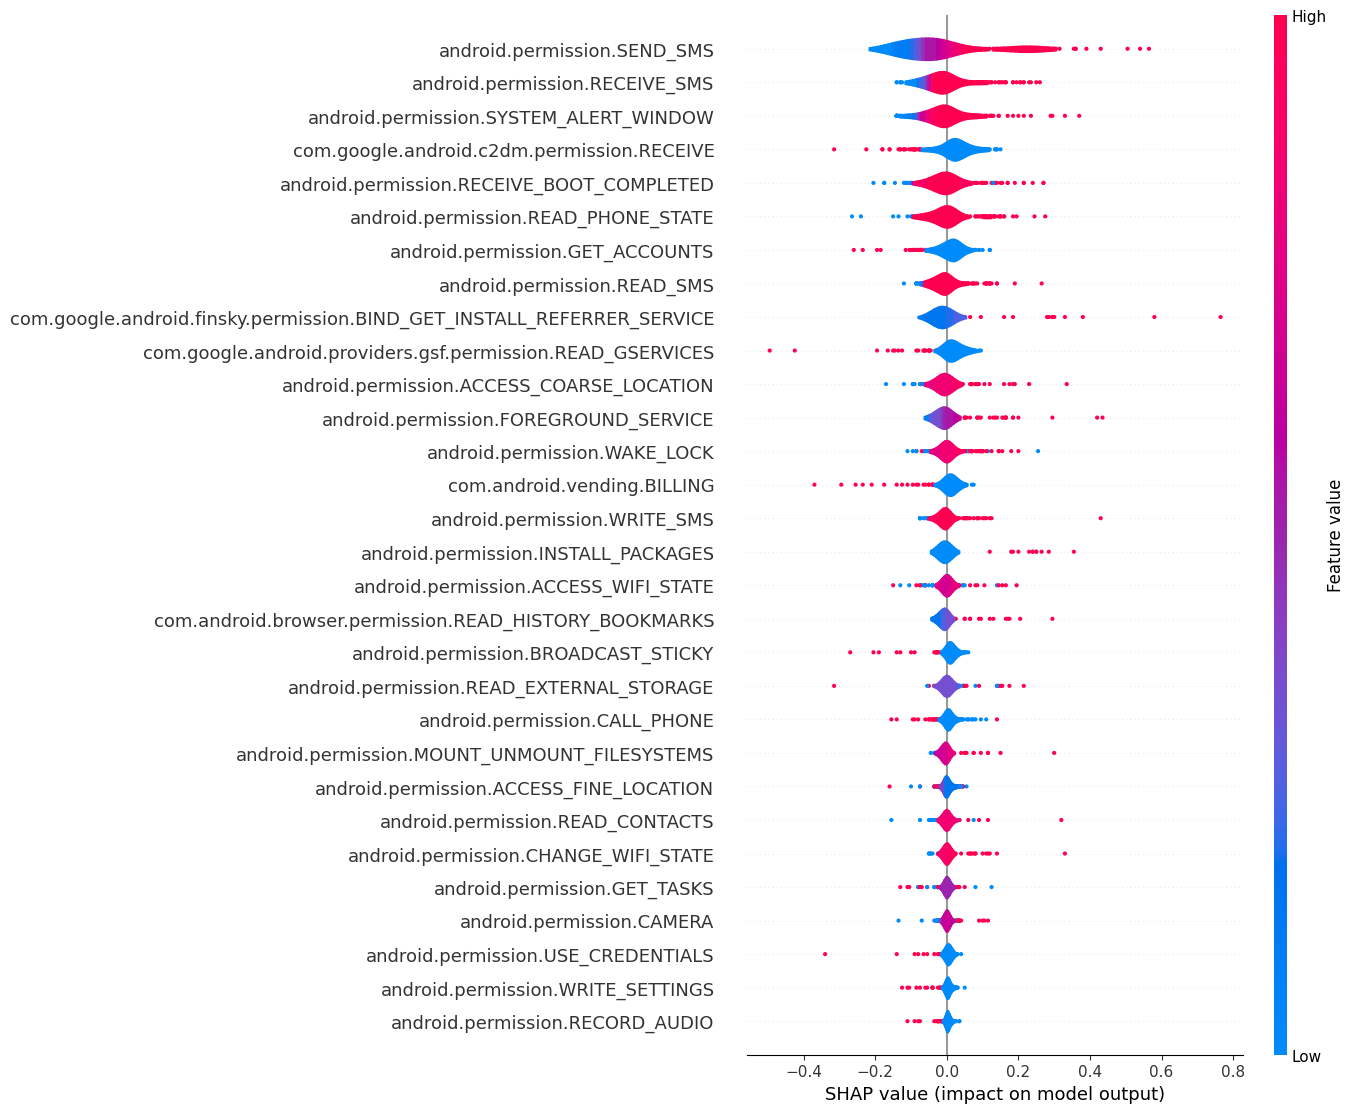

Local Explaination


KeyError: 123

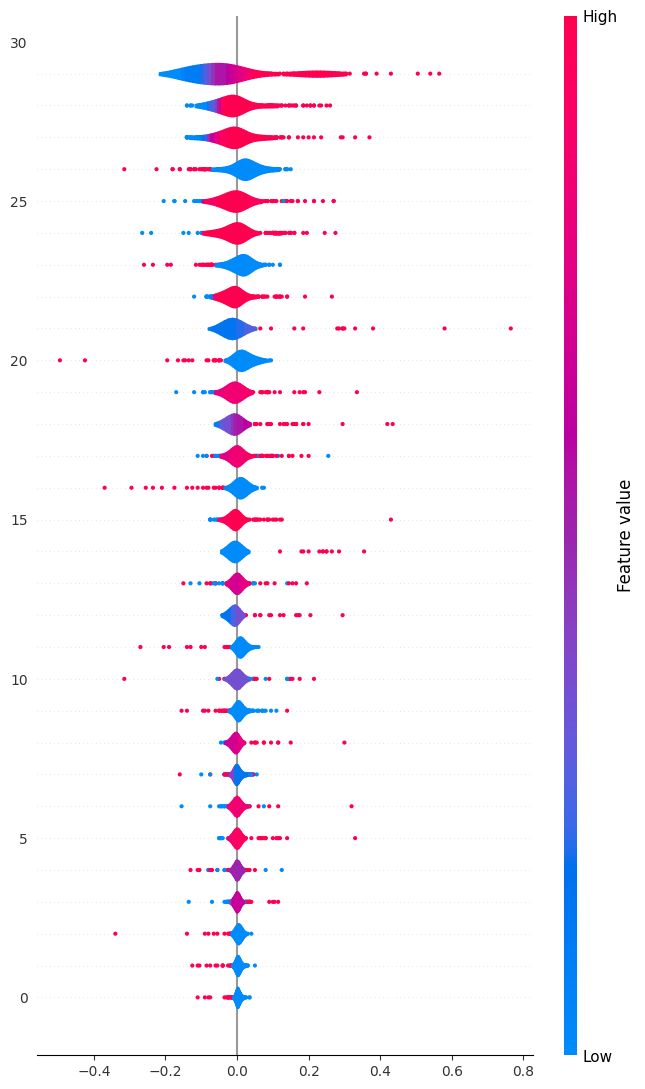

In [40]:
SHAP_EXP(hist_all)